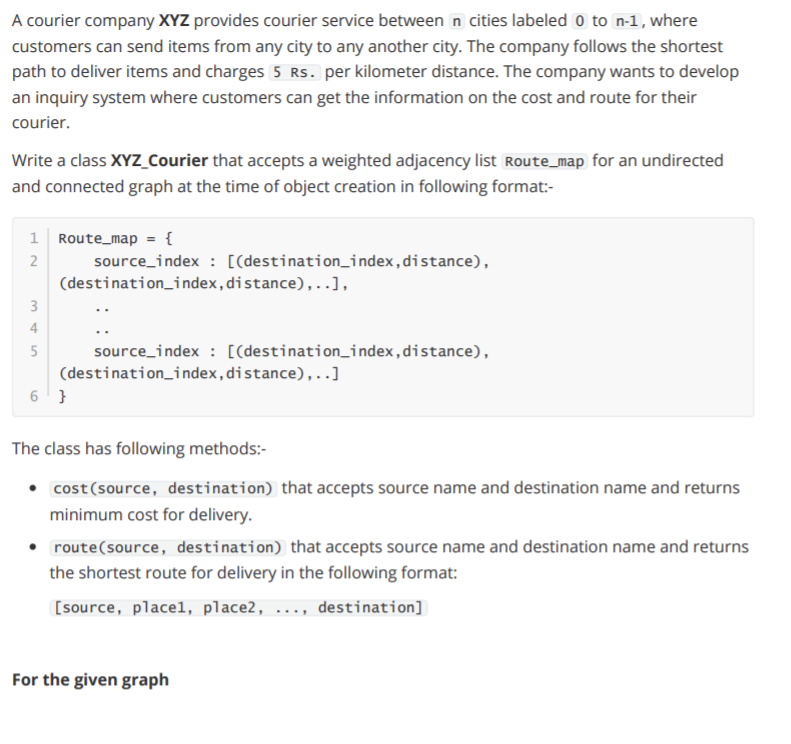

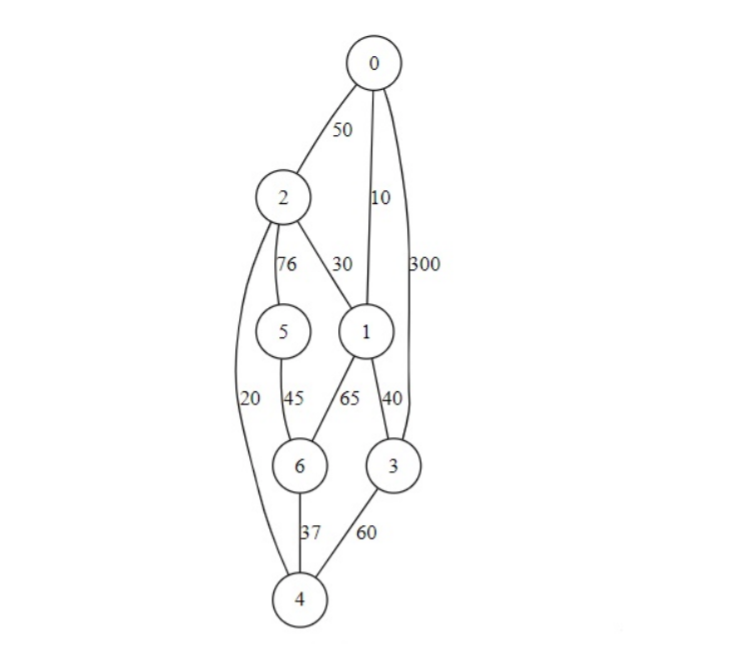

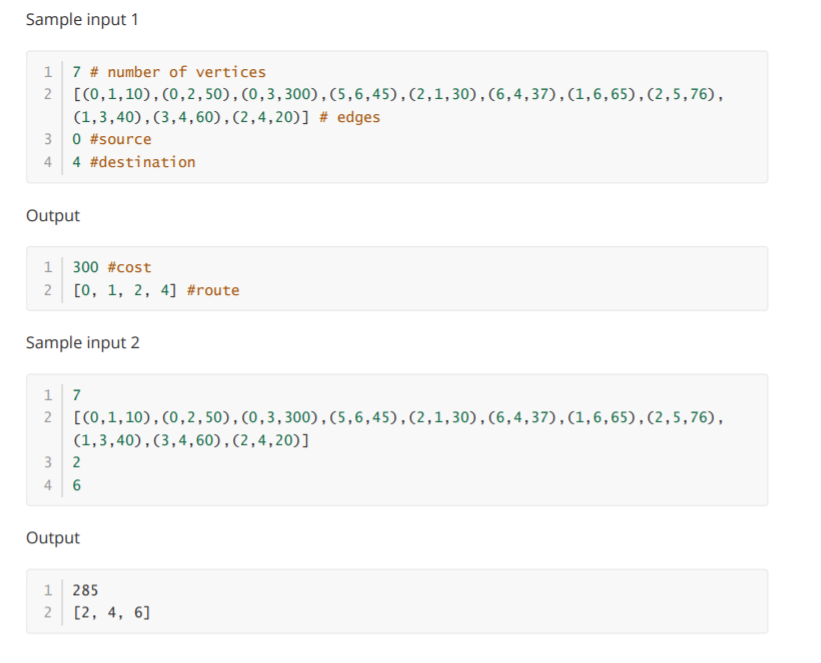

In [1]:
## This problem is of one source to one destination
## For single source shortest path I can use Djikstra Algorithm
## If there was a negative edge- Bellman ford
## All source shortest path- Floyd Warsall

In [ ]:
class XYZ_Courier:
  def __init__(self, Route_map):
    self.Route_map = Route_map

  def dijkstra(self, WList, s):

    '''Maintain three dictionaries'''
    visited = {}
    distance = {}
    previous = {}

    '''Set all the values in distance dictionary to infinity'''
    INF = 9999999999999999

    for v in WList.keys():
      distance[v] = INF

    '''Set all the values in visited dictionary to false'''
    for v in WList.keys():
      visited[v] = False


    '''Set all the values in previous dictionary as None'''
    for v in WList.keys():
      previous[v] = None


    '''First set the distance of source vertex to zero'''
    distance[s] = 0

    '''Now go to each node one by one and check the minimum distance'''
    for u in WList.keys():

      nextDistance = min([distance[v] for v in WList.keys() if not visited[v]])

      nextVertexList = [v for v in WList.keys()
                          if (not visited[v]) and
                           (distance[v] == nextDistance)]

      '''case when all the vertices/ nodes are already visited'''
      if nextVertexList == []:
        break

      '''Take the minimum as nextVetex and set visited = True'''
      nextVertex = min(nextVertexList)
      visited[nextVertex] = True

      '''Recompute the distance of every node'''
      for (node, dist) in WList[nextVertex]:
        if not visited[node]:
          if distance[node] > distance[nextVertex] + dist:
            distance[node] = distance[nextVertex] + dist
            previous[node] = nextVertex

    return (distance, previous)


    def cost(self, source, destination):
      distance, previous = djikstra(self.Route_map, source)
      return 5*distance[destination]


    def route(self, source, destination):
      distance, path = self.dijkstra(self.Route_map, source)

      Route = []

      if distance[destination] != 0:
        dest = destination
        while dest != source:
          Route = [dest] + Route
          for i, j in Route.items():
            if dest == i:
              dest = j
              break
        Route = [dest]+ Route
      return Route